Structures Available :  41
Matrix Size :  4  -  16
Fingerprints :  16
[(27, 1.8726094525570565), (42, 1.8595302065778139), (40, 1.459840740825093), (9, 1.399016329213104), (8, 1.3088810857240847), (10, 1.2621750920895847), (289, 1.1894981647924063), (33, 1.1163709856192898), (97, 1.0808747598973596), (288, 0.8870577432328463), (119, 0.8752163509253806), (272, 0.8497013780136093), (11, 0.8434829412491558), (159, 0.8003733838584931), (281, 0.7364080579075251), (286, 0.7364080579075251)]
Fingerprint Index:  [27, 42, 40, 9, 8, 10, 289, 33, 97, 288, 119, 272, 11, 159, 281, 286]
Fingerprints chosen :  27,42,40,9,8,10,289,33,97,288,119,272,11,159,281,286
Final FP List :  [(27, 1.8726094525570565), (42, 1.8595302065778139), (40, 1.459840740825093), (9, 1.399016329213104), (8, 1.3088810857240847), (10, 1.2621750920895847), (289, 1.1894981647924063), (33, 1.1163709856192898), (97, 1.0808747598973596), (288, 0.8870577432328463), (119, 0.8752163509253806), (272, 0.8497013780136093), (11, 0.8434829

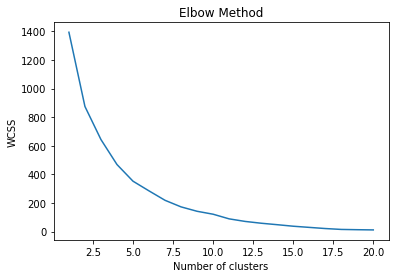

15 [1394.7317073170734, 875.1698564593303, 643.6122807017542, 468.8567251461989, 352.25, 284.35714285714283, 218.42857142857133, 172.42857142857136, 141.62857142857138, 121.12857142857139, 88.6285714285714, 70.6285714285714, 58.03333333333333, 47.766666666666666, 37.099999999999994, 28.933333333333334, 20.86666666666667, 14.6, 12.7, 11.2]

Output
[ 1  1  1  1  1  1  5  5  5  5  5 14 14  1  1  1  1  1  1  6 13  6  4  4
 10  2  4  4  4 12 11  7  0  0  3  3  3  3  3  9  8]
[[ 7.00000000e+00  5.00000000e+00  6.00000000e+00  0.00000000e+00
   0.00000000e+00  3.00000000e+00  0.00000000e+00  0.00000000e+00
   5.00000000e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  3.00000000e+00  3.00000000e+00  2.00000000e+00]
 [ 0.00000000e+00 -4.44089210e-16  0.00000000e+00  1.83333333e+00
   1.50000000e+00  8.33333333e-02  0.00000000e+00  1.11022302e-16
   8.33333333e-02 -1.11022302e-16 -5.55111512e-17 -5.55111512e-17
   1.50000000e+00 -5.55111512e-17  5.55111512e-17  1.11022302e

/home/peter/anaconda3/envs/rdkit/lib/python3.7/site-packages/numpy/core/_asarray.py:102: FutureWarning:

The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.




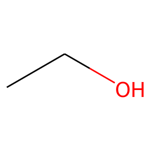
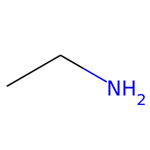
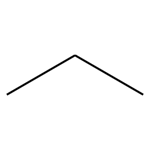
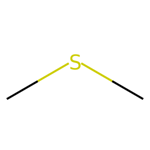
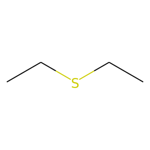
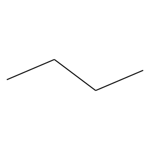
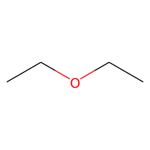
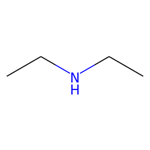
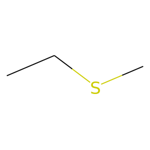
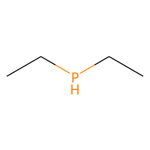
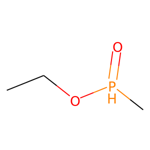
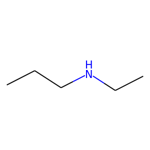


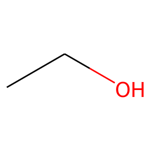
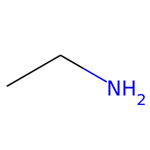
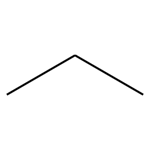
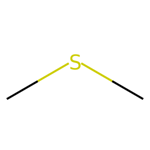
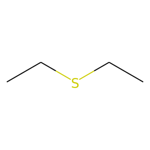
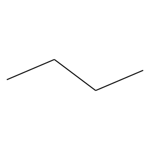
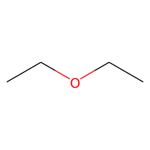
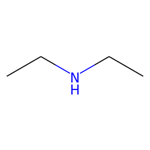
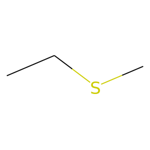
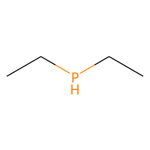
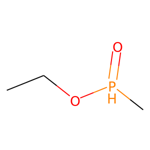
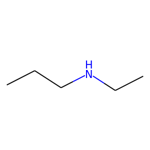

5 [17, 18, 19, 20, 21]



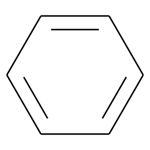
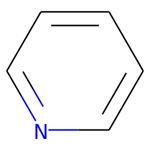
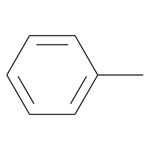
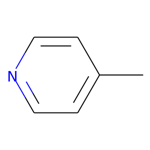
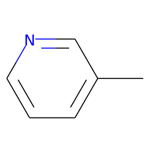


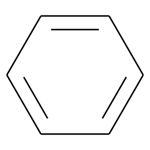
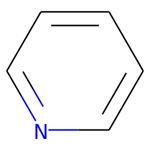
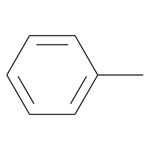
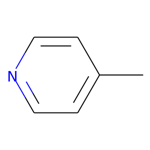
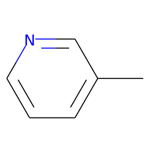

14 [22, 23]



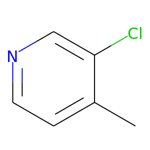
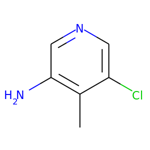


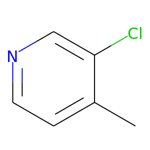
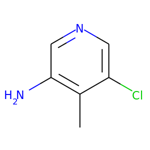

6 [41, 39]



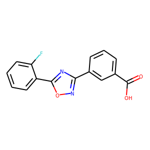
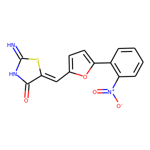


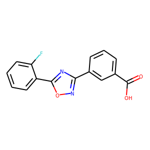
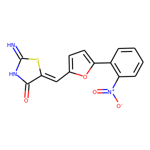

13 [40]



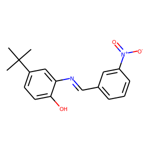


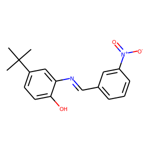

4 [44, 46, 42, 45, 43]



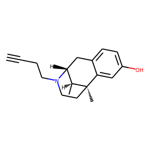
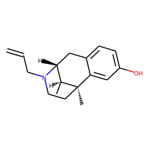
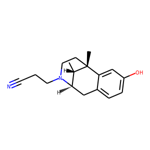
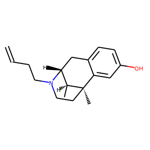
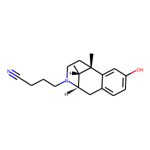


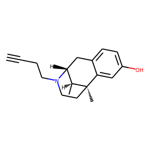
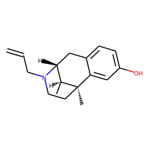
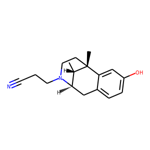
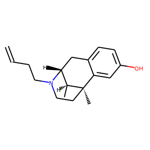
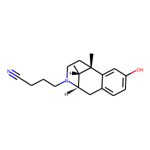

10 [48]



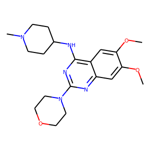


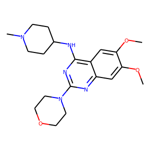

2 [47]



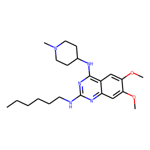


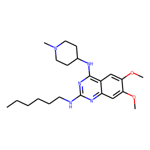

12 [49]



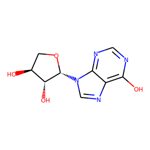


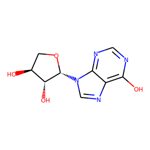

11 [50]



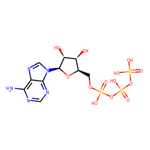


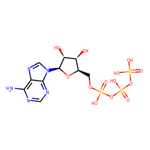

7 [51]



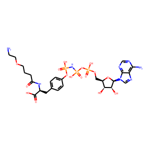


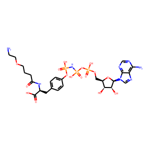

0 [56, 57]



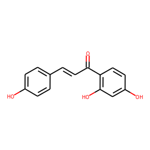
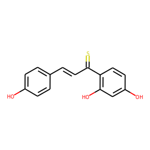


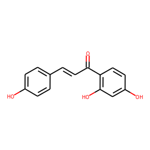
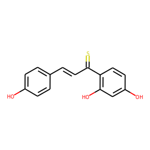

3 [58, 59, 60, 61, 62]



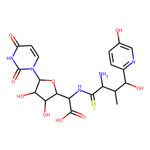
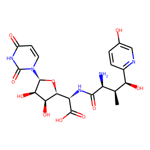
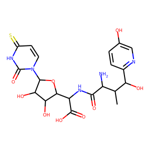
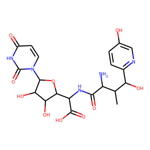
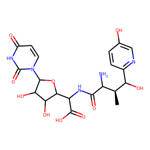


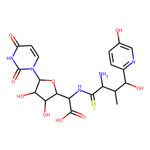
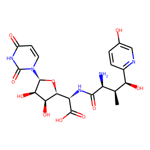
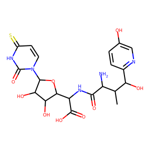
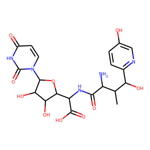
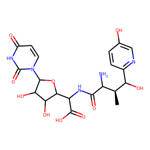

9 [64]



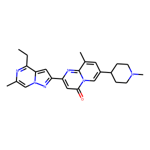


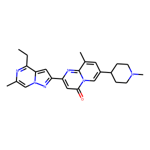

8 [63]



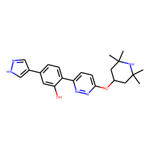


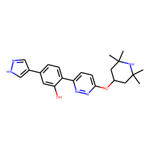

In [13]:
import sys
sys.path.append('/mnt/raid1/Python_projects')
sys.path.append('/mnt/raid1/Python_projects/pkg_mod')

import numpy as np
import math
import psycopg2
import collections
import network2d as n2d
import time

import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from rdkit import Chem, rdBase
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem import AllChem, Descriptors, DataStructs
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
#from datetime import datetime
#import glob
#import matplotlib as mpl
#from matplotlib import pyplot as plt
#from matplotlib import image as mpimg
import ipyplot
#import os
#import pyvis
#from pyvis.network import Network
#import inspect
#from collections import defaultdict

##### Function Definitions #####

import math

def dist(i,j):
    #print(i, j)
    li = len(i)
    lj = len(j)
    q = 0
    if li != lj:
        print('Unequal Length')
    else:
       #q = 0
        for k in range(0,li):
            a = math.sqrt((i[k]-j[k])**2)
            q = q + a
            # print(q, a) 
        return q

    
##### Start Main #####

#network = 2

# Initiate Global Values
fp_index =[]


# open database connection
#db_nn = psycopg2.connect(host = "localhost", dbname="Chemistry", user="postgres", password="postgres")
db_nn = psycopg2.connect(host = "192.168.86.31", dbname="Chemistry", user="postgres", password="postgres")

# Retrieve Structures from Database
cur = db_nn.cursor()
sql = 'SELECT COUNT(*) FROM public."Structures"'
cur.execute(sql)
mol_count = cur.fetchone()
mol_count = mol_count[0]
print('Structures Available : ',mol_count)

ms = int(pow(mol_count, 1/3)+1)
#ms = int(pow(mol_count, 1/2)+1)
msize = pow(ms,2)
print('Matrix Size : ',ms,' - ',msize)
#msize = mol_count

# Retrieve Network from Database
#db_nn = psycopg2.connect(host = "localhost", dbname="Chemistry", user="postgres", password="postgres")
#cur = db_nn.cursor()
#sql = 'SELECT * FROM network."Neurons_2D" WHERE "Network" = '+str(network)
#cur.execute(sql)
#fl = cur.fetchall()
#if len(fl) != 0:
#    print('Network Found')
#    msn = 0
#    for i in fl:
#        msn = max(msn, int(i[0]))
#        msn = msn+1
#        fpn = int(len(fl)/pow(msn,2))
#    for i in range(0,fpn):
#        j = fl[i][5]
#        #print(j)
#        fp_index.append(j)
#    print('Network Size : ',msn,' - ',pow(msn,2))
#    print('Network Fingerprint : ', fpn,' - ', fp_index)
#else:
#    print('Naive Network')
    
#for i in fl:
    #print(i, i[5])
#    if i[5] not in fp_index:
#        fp_index.append(i[5])
        
#print('Network FP_index :',fp_index)

# get Morgan Fingerprints from database
cur = db_nn.cursor()
#sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" WHERE "FP_Type" = 1 ORDER BY "Fingerprint_ID"'
sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" \
WHERE "FP_Type" = 1 ORDER BY "FP_Shannon" DESC LIMIT '+str(msize)
cur.execute(sql)
fp_list = cur.fetchall()

fp = len(fp_list) # set depth of Mapping Matrix
print('Fingerprints : ',fp)
print(fp_list)

# update FingerPrint_Index
for i in fp_list:
    if i[0] not in fp_index:
        fp_index.append(i[0])
        
fp = len(fp_index)

print('Fingerprint Index: ',fp_index)
# print(fp_index.index(5))
# print(fp_index.index(10))

fpa = ''
for i in fp_index:
    #fpa.append(i[0])
    fpa = fpa + str(i) +','
fpa = fpa[:-1]
    
print('Fingerprints chosen : ',fpa)

cur = db_nn.cursor()
#sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" WHERE "FP_Type" = 1 ORDER BY "Fingerprint_ID"'
sql = 'SELECT "Fingerprint_ID", "FP_Shannon" FROM public."Fingerprints" \
WHERE "FP_Type" = 1 AND "Fingerprint_ID" in ('+ fpa +') ORDER BY "FP_Shannon" DESC'
cur.execute(sql)
fp_list = cur.fetchall()

print('Final FP List : ', fp_list)

cur = db_nn.cursor()
#sql = 'SELECT sf.* FROM public."Structure_Fingerprint" sf \
#JOIN public."Fingerprints" fp ON sf."FP_ID" = fp."Fingerprint_ID" \
#WHERE fp."FP_Type" = 1'
sql = 'SELECT sf.* FROM public."Structure_Fingerprint" sf \
WHERE sf."FP_ID" in ('+ fpa +')'

cur.execute(sql)
mol_list = cur.fetchall()
# print(mol_list)

mol_fp = collections.defaultdict(list)
mol_net = {}
net_mol = collections.defaultdict(list)

for i in mol_list:
    a = [i[1], i[2]]
    # print(i, i[0], a)
    mol_fp[i[0]].append(a)
    
# print(mol_fp)
print("Molecules : ", len(mol_fp))
l_rate = 1/len(mol_fp)
print('Rate : ',l_rate, 1-l_rate)
    
# promol = [0] * fp
# print(promol)



#ms = 5
#ma = int((ms-1)/2)
#print(ms, ma)
# fp = 4


##### Generate Fingerprint Probes #####

fp_probes = {}
for i,j in mol_fp.items():
    #print()
    #print(i,j)
    pr = [0] * fp
    #fp_probes[i] = []
    for k in j:
        a = fp_index.index(k[0])
        pr[a] = k[1]
        
    print('Fingerprint probe : ',i, pr)
    fp_probes[i] = pr
    
#print(fp_probes)
fp_max = np.zeros(fp)
#print(fp_max)
for i,j in fp_probes.items():
    #print('Probe : ',j)
    l = len(j)
    for k in range(0,l):
        fp_max[k] = max(fp_max[k],j[k])
    #print('Pro_m : ',fp_max)
print('FP Max Probe : ',fp_max)

##### Create Structure Display Dictionary #####

cur = db_nn.cursor()
sql = 'SELECT "Structure_ID", "SMILES" FROM public."Structures"'
cur.execute(sql)
struct_list = cur.fetchall()
# print(struct_list)
struct_dict = {}
for i in struct_list:
    struct_dict[i[0]] = i[1]

print(struct_dict)

##### Prepare Clustering Set #####

x = []
cmpd_id = []
#sx = []
#sxmin = len(fp_probes)
#sxmax = 0

for k,v in fp_probes.items():
    #print(k,v)
    x.append(v)
    cmpd_id.append(k)

##### Calculate Cluster Cutoff #####

wcss = []

a = int(mol_count/2)+1

for i in range(1, a):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    if kmeans.inertia_ > mol_count:
        cut_off = i

cut_off = cut_off +1        
        
plt.plot(range(1, a), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print(cut_off, wcss)

##### Calculate Initial Clustering #####

kmeans = KMeans(n_clusters=cut_off, init='k-means++', max_iter=300, n_init=10, random_state=0)
#kmeans = KMeans(n_clusters= 9, init=q, max_iter=300, n_init=1, random_state=0)
pred_y = kmeans.fit_predict(x)

print()
print('Output')
print(pred_y)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.labels_)

print(struct_dict)
print(net_mol)

k_mol = collections.defaultdict(list)

j = 0
for i in pred_y:
    print(i, j, cmpd_id[j])
    k_mol[i].append(cmpd_id[j])
    j = j+1
    
print(k_mol)

print()
print('Net Elements : ')
for i,j in k_mol.items():
    print(i,j)
    gmol = []
    if len(j) != 0:
        for k in j:
            #print(struct_dict[k])
            s = struct_dict[k]
            m = Chem.MolFromSmiles(s)
            #print(m)
            mw = Chem.Descriptors.MolWt(m)
            # print(mw)
            #print('Image in', s)
            # md = Draw.MolToImage(m)
            gmol.append(Draw.MolToImage(m))
            #print('Image out')
            # Draw.MolsToGridImage(gmol, molsPerRow=1)
        ipyplot.plot_images(gmol, max_images = 30, img_width = 150)


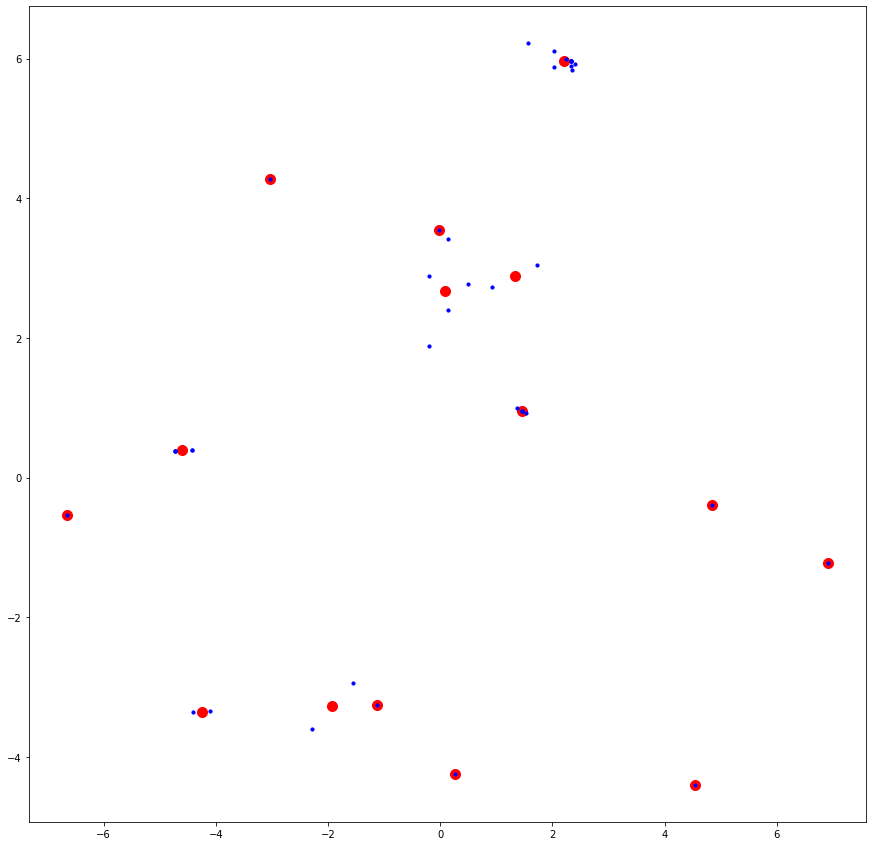

In [19]:
##### Calculate Initial PCA #####

from sklearn.decomposition import PCA

kmc = kmeans.cluster_centers_

pca = PCA(n_components=3)

pca.fit(kmc)

kpca = pca.transform(kmc)
spca = pca.transform(x)

#print(pca.n_components_, pca.n_features_)
#print(pca.explained_variance_)
#print(pca.components_)

#kpcadf = pd.DataFrame(data = kpca
#             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#print(kpca)
figdim = 15
plt.figure(figsize=(figdim,figdim))
plt.scatter(kpca[:,0], kpca[:,1], c= 'r', s = 100)
plt.scatter(spca[:,0], spca[:,1], c= 'b', s = 10)

In [12]:
print()

In [22]:
import plotly.graph_objects as go
import numpy as np

#print(struct_dict)
smol = []
ssmi = []
sind = []
stxt = []
for k,s in struct_dict.items():
    #print(struct_dict[k])
    #print(s)
    #s = struct_dict[k]
    m = Chem.MolFromSmiles(s)
            #print(m)
            #mw = Chem.Descriptors.MolWt(m)
            # print(mw)
            #print('Image in', s)
            # md = Draw.MolToImage(m)
    smol.append(Draw.MolToImage(m))
    ssmi.append(s)
    sind.append(k)
    t = str(k)+' - '+s
    stxt.append(t)
    #ssmi[k] = s
            #print('Image out')
            # Draw.MolsToGridImage(gmol, molsPerRow=1)
#ipyplot.plot_images(smol, max_images = 30, img_width = 150)

#print(ssmi, sind)



# Plot 3D ChemSpace
xs = spca[:,0]
ys = spca[:,1]
zs = spca[:,2]

spcadf = pd.DataFrame(data = spca
             , columns = ['x', 'y', 'z'])
spcadf['ID'] = sind
spcadf['text'] = stxt

#print(spcadf)


fig3d = go.Figure(data=[go.Scatter3d(
    x=spcadf['x'],
    y=spcadf['y'],
    z=spcadf['z'],
    hoverinfo = 'text',
    hovertext = (spcadf['text']),
    mode='markers',
    marker=dict(
        size=12,
        color=pred_y,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8 
    )
)])

# tight layout
fig3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig3d.show()

print(fig3d.data)

(Scatter3d({
    'hoverinfo': 'text',
    'hovertext': [10 - CCO, 11 - CCN, 13 - CCC, 14 - CSC, 15 - CCSCC, 16 - CCCC,
                  17 - c1ccccc1, 18 - c1cnccc1, 19 - Cc1ccccc1, 20 - Cc1ccncc1, 21
                  - Cc1cccnc1, 22 - Cc1ccncc1Cl, 23 - Cc1c(N)cncc1Cl, 24 - CCOCC,
                  34 - CCNCC, 35 - CCSC, 36 - CCPCC, 37 - CCOP(=O)C, 38 - CCCNCC,
                  39 - O=C1NC(S/C1=C\C2=CC=C(C3=C([N+]([O-])=O)C=CC=C3)O2)=N, 40 -
                  OC1=CC=C(C(C)(C)C)C=C1/N=C/C2=CC=CC([N+]([O-])=O)=C2 , 41 -
                  C1=CC=C(C(=C1)C2=NC(=NO2)C3=CC(=CC=C3)C(=O)O)F, 42 -
                  C[C@H]1[C@H]2Cc3ccc(O)cc3[C@@]1(C)CCN2CCC#N, 43 -
                  C[C@H]1[C@H]2Cc3ccc(O)cc3[C@@]1(C)CCN2CCCC#N, 44 -
                  C#CCCN1CC[C@]2(C)c3cc(O)ccc3C[C@@H]1[C@@H]2C, 45 -
                  C=CCCN1CC[C@]2(C)c3cc(O)ccc3C[C@@H]1[C@@H]2C, 46 -
                  C=CCN1CC[C@]2(C)c3cc(O)ccc3C[C@@H]1[C@@H]2C, 47 -
                  CCCCCCNc1nc(NC2CCN(C)CC2)c2cc(OC)c(OC)cc2

In [28]:
from ipywidgets import Image as widimg
from PIL import Image
import io

from plotly.callbacks import Points, InputDeviceState
points, state = Points(), InputDeviceState()

def image_to_byte_array(image:Image):
    imgByteArr = io.BytesIO()
    image.save(imgByteArr, format=image.format)
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr



#img = Image.open(fh, mode='r')
#roi_img = img.crop(box)

#img_byte_arr = io.BytesIO()
#roi_img.save(img_byte_arr, format='PNG')
#img_byte_arr = img_byte_arr.getvalue()

#print(struct_dict)
molpic = {}
for i, j in struct_dict.items():
    #print(i,j)
    m = Chem.MolFromSmiles(j)
    #print(m)
    mw = Chem.Descriptors.MolWt(m)
    #print(mw)
    md = Draw.MolToImage(m)
    #print(type(md), md)
    b = image_to_byte_array(md)
    #print(type(b), b)
    molpic[i] = b
    widimg(value = molpic[i])
    



#widimg(value = molpic[48])

from ipywidgets import interactive
from ipywidgets import HTML
mol_details = HTML()
mol_details

from ipywidgets import Layout
image_widget = widimg(
    value=molpic[48],
    layout=Layout(height='300px', width='300px')
)


def hover_fn(trace, points, state):
    ind = points.point_inds[0]
    # Update details HTML widget
    mol_details.value = spcadf.iloc[ind].to_frame().to_html()
    #details.value = spcadf['text'].iloc[ind].to_frame().to_html()    
    # Update image widget
    pind = int(spcadf['ID'][ind])
    image_widget.value = molpic[pind]
    print(trace, points, state)
    print(ind, type(ind), pind, type(pind), mol_details)

fig.layout.hovermode = 'closest'
scatter = fig.data[0]
scatter.text = spcadf['ID']
scatter.hoverinfo = 'text'
scatter.on_hover(hover_fn)
#print(scatter)

fig = go.FigureWidget(data=[dict(type = 'scattergl',
    x=spcadf['x'],
    y=spcadf['y'],
    #z=spcadf['z'],
    hoverinfo = 'text',
    hovertext = (spcadf['ID']),
    mode='markers',
    marker=dict(
        size=12,
        color=pred_y,                # set color to an array/list of desired values
        colorscale= 'rainbow', #'Viridis',   # choose a colorscale
        opacity=0.8 
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.show()

from ipywidgets import HBox, VBox
fig.layout.hovermode = 'closest'

VBox([fig, HBox([image_widget, mol_details])])
      #opacity_slider,
      #HBox([image_widget, details])])

    'data': [{'hoverinfo': 'text',
              'hovertext': [10, 11, 13, 14, 1…

In [17]:

from ipywidgets import HBox, VBox
fig.layout.hovermode = 'closest'

VBox([fig, HBox([image_widget, mol_details])])
      #opacity_slider,
      #HBox([image_widget, details])])

    'data': [{'hoverinfo': 'text',
              'hovertext': [10, 11, 13, 14, 1…

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

Scattergl({
    'hoverinfo': 'text',
    'hovertext': [10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35,
                  36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
                  56, 57, 58, 59, 60, 61, 62, 63, 64],
    'marker': {'color': array([ 1,  1,  1,  1,  1,  1,  5,  5,  5,  5,  5, 14, 14,  1,  1,  1,  1,  1,
                                1,  6, 13,  6,  4,  4, 10,  2,  4,  4,  4, 12, 11,  7,  0,  0,  3,  3,
                                3,  3,  3,  9,  8], dtype=int32),
               'colorscale': [[0.0, 'rgb(150,0,90)'], [0.125, 'rgb(0,0,200)'],
                              [0.25, 'rgb(0,25,255)'], [0.375, 'rgb(0,152,255)'],
                              [0.5, 'rgb(44,255,150)'], [0.625, 'rgb(151,255,0)'],
                              [0.75, 'rgb(255,234,0)'], [0.875, 'rgb(255,111,0)'],
                              [1.0, 'rgb(255,0,0)']],
               'opacity': 0.8,
               'size': 12},
    'mode': 'markers',
    'text

In [26]:
fig3dw = go.FigureWidget(data=[dict(type = 'scatter3d',
    x=spcadf['x'],
    y=spcadf['y'],
    z=spcadf['z'],
    hoverinfo = 'text',
    hovertext = (spcadf['ID']),
    mode='markers',
    marker=dict(
        size=12,
        color=pred_y,                # set color to an array/list of desired values
        colorscale= 'rainbow', #'Viridis',   # choose a colorscale
        opacity=0.8 
    )
)])


fig3dw.layout.hovermode = 'closest'

VBox([fig3dw, HBox([image_widget, mol_details])])

    'data': [{'hoverinfo': 'text',
              'hovertext': [10, 11, 13, 14, 1…

In [25]:
fig3dw.layout.hovermode = 'closest'

VBox([fig3dw, HBox([image_widget, mol_details])])

    'data': [{'hoverinfo': 'text',
              'hovertext': [10, 11, 13, 14, 1…

In [27]:
help(go.FigureWidget)

Help on class FigureWidget in module plotly.graph_objs._figurewidget:

class FigureWidget(plotly.basewidget.BaseFigureWidget)
 |  FigureWidget(*args, **kwargs)
 |  
 |  Base class for FigureWidget. The FigureWidget class is code-generated as a
 |  subclass
 |  
 |  Method resolution order:
 |      FigureWidget
 |      plotly.basewidget.BaseFigureWidget
 |      plotly.basedatatypes.BaseFigure
 |      ipywidgets.widgets.domwidget.DOMWidget
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, layout=None, frames=None, skip_invalid=False, **kwargs)
 |      Create a new :class:FigureWidget instance
 |      
 |      Parameters
 |      ----------
 |      data
 |          The 'data' property is a tuple of trace instances
 |          that may be specified as:
 |            - A list or tup